MachineLeaningCourse vol.9
# 交差検定・評価指標

### K分割交差検定
対象のデータをK個に分割し、そのうちの一個をテストデータ、残りのK-1個をトレーニングデータとして学習する方法です。

テストデータを変更しながらK回の学習と検証を繰り返します。
![](https://s3.amazonaws.com/ai-standard/pic9-1.png)

### 性能評価指標

分類器の評価をするための指標について勉強していきます。

説明のために、positiveとnegativeのいづれかを返す二値分類器を考えます。この場合、positiveとnegativeそれぞれについてTure(正解)とFalse(不正解)があるので、以下の様に４つの組み合わせがあります。

![](https://s3.amazonaws.com/ai-standard/pic9-2.png)

この表は、__混同行列__と呼ばれるもので、分類器の評価でよく使われます。

そして、指標性能としてよく使われるのが以下です。

#### 正答率
正解率（Accuracy）は、全体の事象の中で正解がどれだけあったかの比率です。

$$Accuracy = \frac{TP + TN}{TP + FP + FN + TN}$$

#### 適合率
適合率（Precision）は、分類器がpositiveと予想した中で、真にpositiveなものの比率です。

$$Precision = \frac{TP}{TP + FP}$$

#### 再現率
再現率（Recall）は、真にpositiveな物に対して、分類器がどれだけpositiveと予測できたかを表す指標です。

$$Recall = \frac{TP}{TP + FN}$$

#### F値
一般に、再現率の高いシステムは適合率が低く、その逆に、適合率が高いシステムは再現率が低い傾向にあります。
評価指標が2つあると、どちらのシステムが優れているか比較が難しいので、再現率と適合率の調和平均を取った値をF値（F-measure）という指標で性能を表すことがあります。

$$F\ measure = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$$

$$=\frac{2 * Precision * Recall}{Precision + Recall}$$

### ROC曲線


ROC曲線は以下のURLを参考にするとわかりやすい。

http://qiita.com/kenmatsu4/items/550b38f4fa31e9af6f4f

#### Irisデータのロード

In [5]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# トレーニングデータの平均と標準偏差を計算
scaler.fit(X_train)

# 平均と標準偏差を用いて標準化
X_train_std = scaler.transform(X_train)
X_test_std =  scaler.transform(X_test)

### グリッドサーチを用いて、最適なパラメータを見つける
〜　使い方　〜

    GridSearchCV(モデル, パラメータ, scoring=評価指標, cv=クロスバリデーションのKの値)

【公式ドキュメント】

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

【スコア一覧】

http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [8]:
from sklearn.grid_search import GridSearchCV

#### パーセプトロン

In [22]:
from sklearn.linear_model import Perceptron

# ハイパーパラメータの設定
param = {'eta0': [10**i for i in range(-5, 5)]}
print(param)

ppn_clf = GridSearchCV(Perceptron(n_iter=40, random_state=0, shuffle=True), param, cv=5, scoring='f1_micro')
ppn_clf.fit(X_train_std, y_train)

{'eta0': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}


GridSearchCV(cv=5, error_score='raise',
       estimator=Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'eta0': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_micro', verbose=0)

グリッドサーチの結果を表示する関数を定義します。

In [19]:
def print_param_table(clf, X_test, y_test, score):
    from sklearn.metrics import classification_report
    print("#　スコアリング: {}\n".format(score))
    print("# ベストモデル:\n\n{}\n".format(clf.best_estimator_))
    print("# ベストパラメータ:\n\n{}\n".format(clf.best_params_))
    print("# トレーニングデータでCVした時の平均スコア:\n")
    for params, mean_score, scores in clf.grid_scores_:
        print("{:.3f} (+/- {:.5f}) for {}".format(mean_score, scores.std() * 2, params))
    print("\n# テストデータでの識別結果:\n")
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))

In [12]:
print_param_table(ppn_clf, X_test_std, y_test, 'f1_micro')

#　スコアリング: f1_micro

# ベストモデル:

Perceptron(alpha=0.0001, class_weight=None, eta0=1e-05, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

# ベストパラメータ:

{'eta0': 1e-05}

# トレーニングデータでCVした時の平均スコア:

0.743 (+/- 0.23010) for {'eta0': 1e-05}
0.743 (+/- 0.23010) for {'eta0': 0.0001}
0.743 (+/- 0.23010) for {'eta0': 0.001}
0.743 (+/- 0.23010) for {'eta0': 0.01}
0.743 (+/- 0.23010) for {'eta0': 0.1}
0.743 (+/- 0.23010) for {'eta0': 1}
0.743 (+/- 0.23010) for {'eta0': 10}
0.743 (+/- 0.23010) for {'eta0': 100}
0.743 (+/- 0.23010) for {'eta0': 1000}
0.743 (+/- 0.23010) for {'eta0': 10000}

# テストデータでの識別結果:

             precision    recall  f1-score   support

          0       0.89      1.00      0.94        16
          1       0.94      0.83      0.88        18
          2       0.91      0.91      0.91        11

avg / total       0.91      0.91      0.91        45



#### ロジスティック回帰

In [14]:
from sklearn.linear_model import LogisticRegression

param = {'C': [10**i for i in range(-5, 5)]}
print(param)

lr_clf = GridSearchCV(LogisticRegression(random_state=0), param, cv=5, scoring='f1_micro')
lr_clf.fit(X_train_std, y_train)

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_micro', verbose=0)

In [15]:
print_param_table(lr_clf, X_test_std, y_test, 'f1_micro')

#　スコアリング: f1_micro

# ベストモデル:

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# ベストパラメータ:

{'C': 10}

# トレーニングデータでCVした時の平均スコア:

0.695 (+/- 0.03108) for {'C': 1e-05}
0.695 (+/- 0.03108) for {'C': 0.0001}
0.695 (+/- 0.03108) for {'C': 0.001}
0.695 (+/- 0.03108) for {'C': 0.01}
0.695 (+/- 0.03108) for {'C': 0.1}
0.914 (+/- 0.06463) for {'C': 1}
0.952 (+/- 0.05776) for {'C': 10}
0.952 (+/- 0.09974) for {'C': 100}
0.952 (+/- 0.09974) for {'C': 1000}
0.952 (+/- 0.09974) for {'C': 10000}

# テストデータでの識別結果:

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.94      0.94      0.94        18
          2       0.91      0.91      0.91        11

avg / total       0.96      0.96      0.96        45



#### SVM
SVMはチューニングできるパラメータが、これまでの物に比べると多くなっています。

In [16]:
from sklearn.svm import SVC

param = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]
print(param)

[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]}, {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'gamma': [0.001, 0.0001], 'degree': [2, 3, 4]}, {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}]


In [230]:
svm_clf = GridSearchCV(SVC(), param, cv=5, scoring='f1_micro')
svm_clf.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}, {'degree': [2, 3, 4], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_micro', verbose=0)

In [231]:
print_param_table(svm_clf, X_test_std, y_test, 'f1_micro')

#　スコアリング: f1_micro

# ベストモデル:

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# ベストパラメータ:

{'C': 1, 'kernel': 'linear'}

# トレーニングデータでCVした時の平均スコア:

0.952 (+/- 0.09974) for {'C': 1, 'kernel': 'linear'}
0.952 (+/- 0.09974) for {'C': 10, 'kernel': 'linear'}
0.933 (+/- 0.09279) for {'C': 100, 'kernel': 'linear'}
0.943 (+/- 0.08848) for {'C': 1000, 'kernel': 'linear'}
0.371 (+/- 0.01579) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.371 (+/- 0.01579) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.790 (+/- 0.04255) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.371 (+/- 0.01579) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.952 (+/- 0.09974) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.790 (+/- 0.04255) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.952 (+/- 0.09974) for {'C': 1000, 'gamma': 0.001,

SVMはパーセプトロン、ロジスティック回帰に比べて性能がとても高いことが分かりました。

ここでSVMでの予測結果を混合行列にまとめます。

In [31]:
# 混合行列をプロットする関数

%matplotlib inline
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
    confmat = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

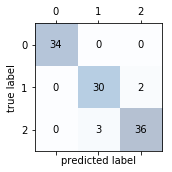

In [32]:
from sklearn.metrics import confusion_matrix

# 上記のグリッドサーチで見つけた、最適なパラメータで予測
svm = SVC(C=1, kernel='linear')
svm.fit(X_train_std, y_train)

plot_confusion_matrix(y_train, svm.predict(X_train_std))

テストデータでの誤分類数は５つということが見て分かります。